# 🔌 Problem 1: Equivalent Resistance Using Graph Theory

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px;">
<h2 style="color: #2E86C1; text-align: center;">📐 Visualizing Circuit Simplification Step-by-Step</h2>
</div>

---

## 🎯 Motivation

Calculating equivalent resistance is a fundamental task in circuit analysis. While series and parallel rules work well for simple circuits, **graph theory** provides a powerful, automated way to analyze **complex resistor networks**.

A circuit is modeled as a graph:
- **Nodes** represent junctions
- **Edges** represent resistors (with weights equal to resistance)

---

## 🧠 Approach

We reduce the graph step by step using:

1. 🔗 **Series Reduction**  
   Two resistors in a chain become one with total resistance:  
   $$ R_{\text{eq}} = R_1 + R_2 $$

2. 🔁 **Parallel Reduction**  
   Two or more resistors between the same nodes:  
   $$ \frac{1}{R_{\text{eq}}} = \frac{1}{R_1} + \frac{1}{R_2} + \cdots $$

3. 🔄 Repeat until the entire network reduces to a single equivalent resistance.

---

## 🧮 Example Circuit

A simple 4-node graph with resistors:

- 2Ω between nodes (1)-(2)  
- 3Ω between nodes (2)-(3)  
- 4Ω between nodes (3)-(4)  
- 1Ω directly between nodes (1)-(4)

---

## ⚙️ Algorithm Pseudocode

```plaintext
while graph not reduced:
    if a node has exactly 2 neighbors:
        combine series resistors
    if parallel resistors exist:
        combine using reciprocal rule


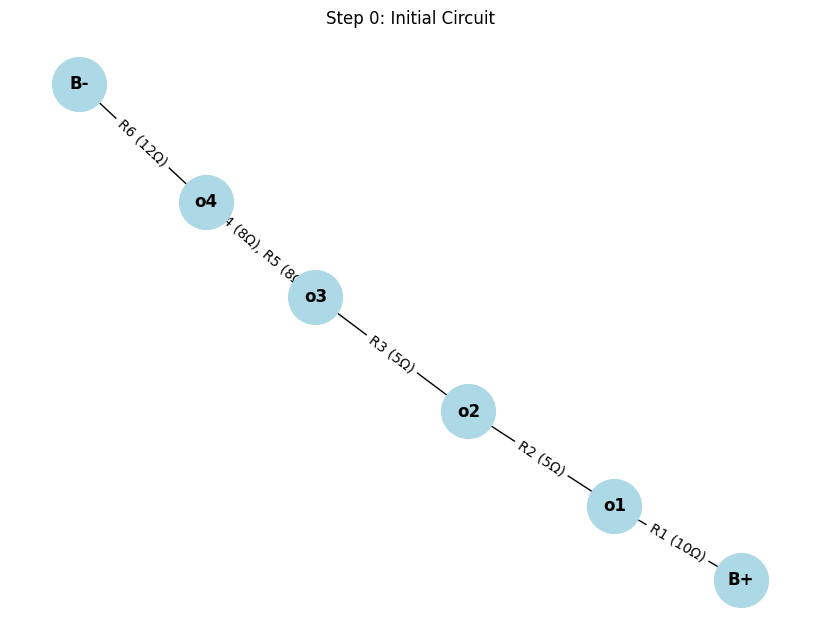

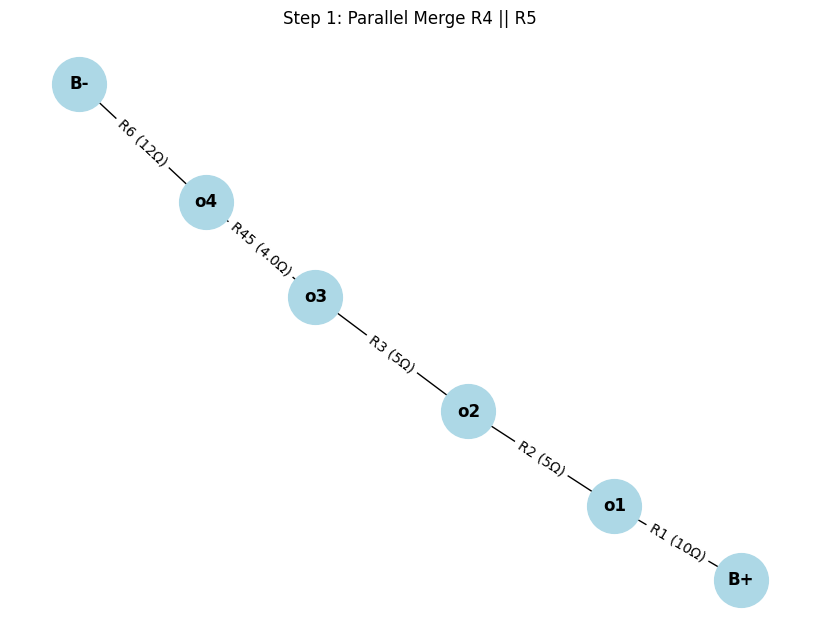

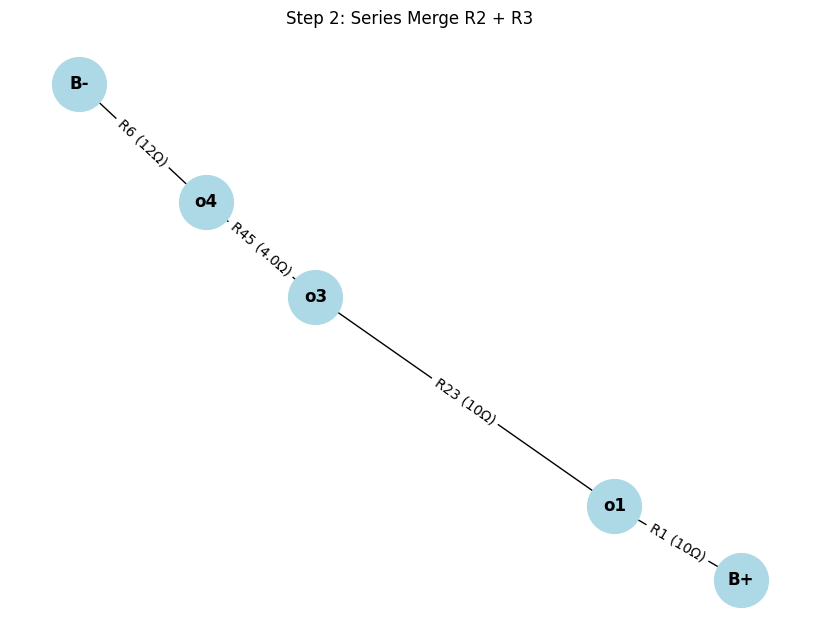

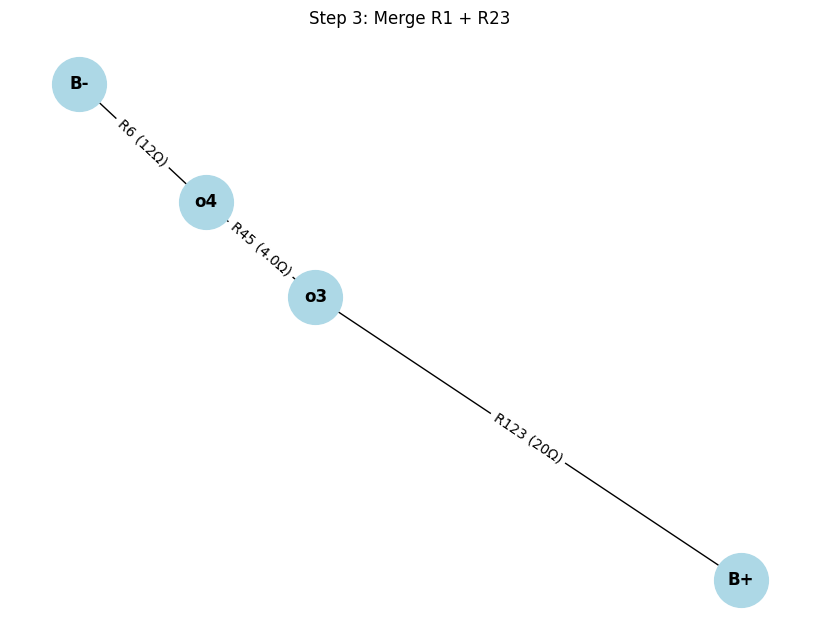

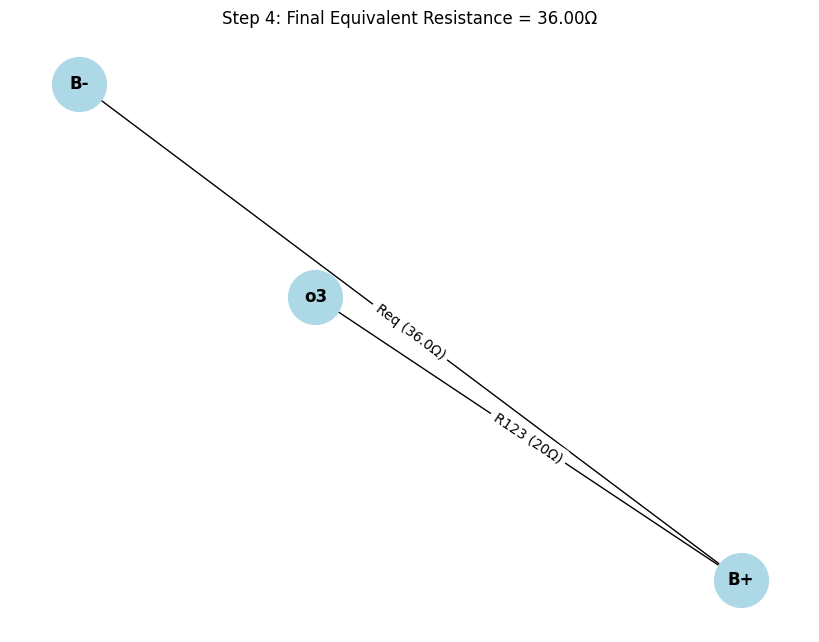

{'B+': array([ 1.        , -0.17615204]),
 'o1': array([ 0.624828  , -0.12024413]),
 'o2': array([ 0.19129443, -0.04874362]),
 'o3': array([-0.2630887 ,  0.03775625]),
 'o4': array([-0.58894814,  0.10913078]),
 'B-': array([-0.9640856 ,  0.19825276])}

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_circuit(G, title, pos=None, filename=None):
    if pos is None:
        pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(8, 6))
    edge_labels = {}
    for u, v, key, data in G.edges(keys=True, data=True):
        label = data.get("label", "")
        resistance = data.get("resistance", "")
        full_label = f"{label} ({resistance}Ω)"
        if (u, v) in edge_labels:
            edge_labels[(u, v)] += f", {full_label}"
        else:
            edge_labels[(u, v)] = full_label

    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    if filename:
        plt.savefig(filename)
    plt.show()
    return pos

# Step 0: Initial Circuit
G = nx.MultiGraph()
G.add_edge("B+", "o1", label="R1", resistance=10)
G.add_edge("o1", "o2", label="R2", resistance=5)
G.add_edge("o2", "o3", label="R3", resistance=5)
G.add_edge("o3", "o4", label="R4", resistance=8)
G.add_edge("o3", "o4", label="R5", resistance=8)
G.add_edge("o4", "B-", label="R6", resistance=12)

pos = draw_circuit(G, "Step 0: Initial Circuit", filename="step0.png")

# Step 1: Merge R4 and R5 (Parallel)
G.remove_edges_from([(u, v, k) for u, v, k, d in G.edges(keys=True, data=True)
                     if d["label"] in ["R4", "R5"]])
parallel_res = 1 / (1/8 + 1/8)
G.add_edge("o3", "o4", label="R45", resistance=parallel_res)
draw_circuit(G, "Step 1: Parallel Merge R4 || R5", pos=pos, filename="step1.png")

# Step 2: Merge R2 and R3 (Series)
G.remove_edge("o1", "o2")
G.remove_edge("o2", "o3")
G.remove_node("o2")
series_res_23 = 5 + 5
G.add_edge("o1", "o3", label="R23", resistance=series_res_23)
draw_circuit(G, "Step 2: Series Merge R2 + R3", pos=pos, filename="step2.png")

# Step 3: Merge R1 and R23 (Series)
G.remove_edge("B+", "o1")
G.remove_edge("o1", "o3")
G.remove_node("o1")
G.add_edge("B+", "o3", label="R123", resistance=10 + series_res_23)
draw_circuit(G, "Step 3: Merge R1 + R23", pos=pos, filename="step3.png")

# Step 4: Final Merge (Series with R123, R45, and R6)
G.remove_edge("o3", "o4")
G.remove_edge("o4", "B-")
G.remove_node("o4")
res_final = G["B+"]["o3"][0]["resistance"] + parallel_res + 12
G.add_edge("B+", "B-", label="Req", resistance=round(res_final, 2))
draw_circuit(G, f"Step 4: Final Equivalent Resistance = {res_final:.2f}Ω", pos=pos, filename="step4.png")


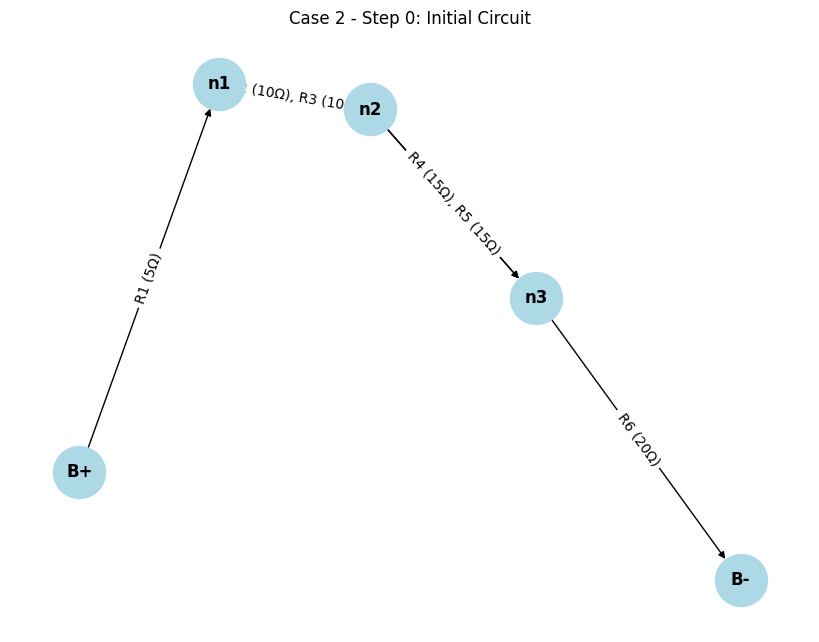

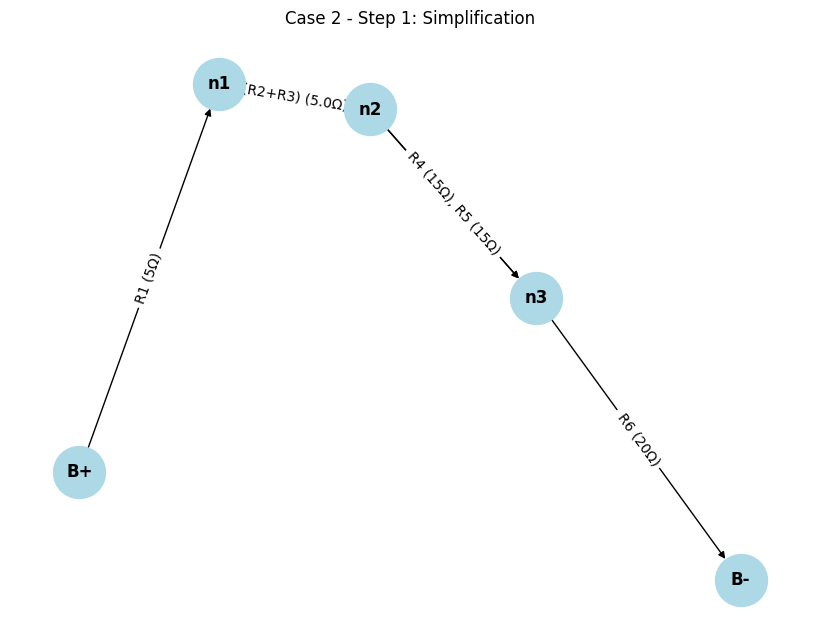

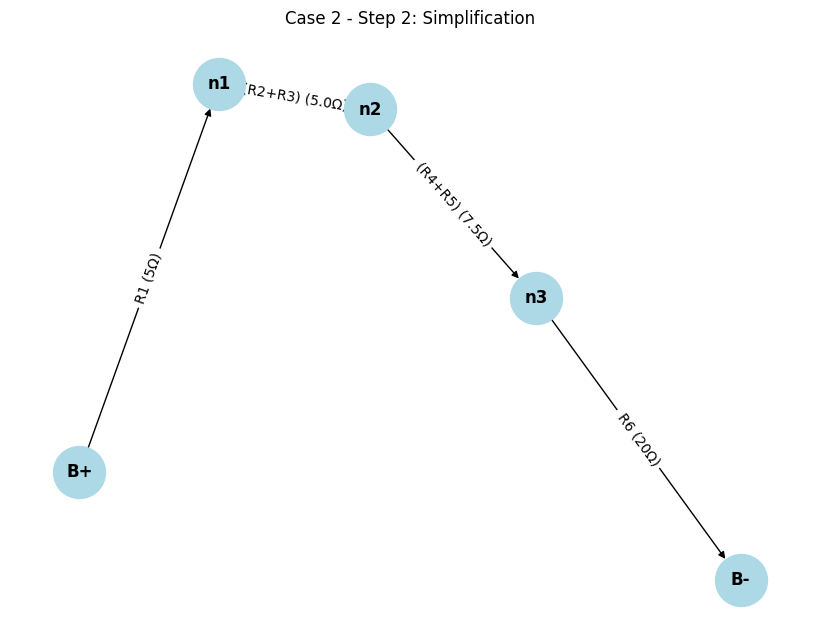

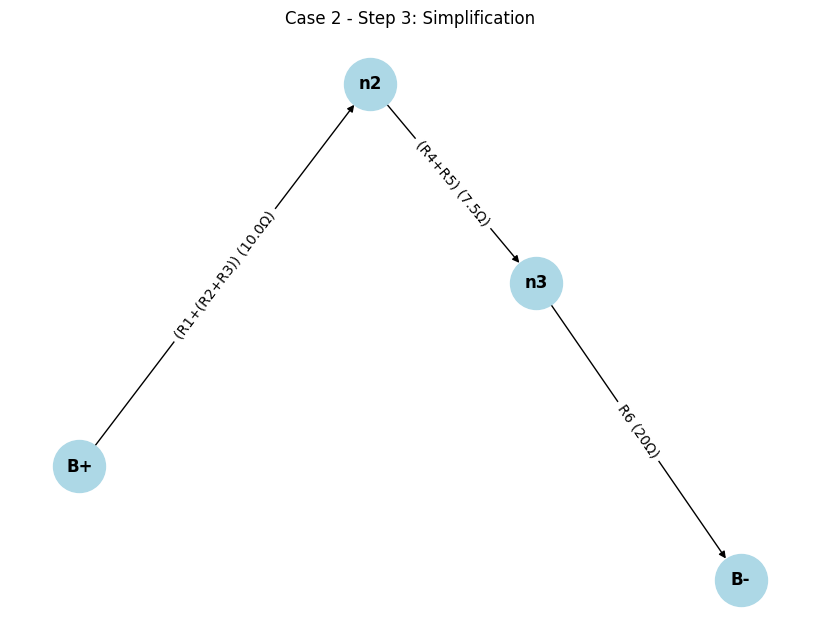

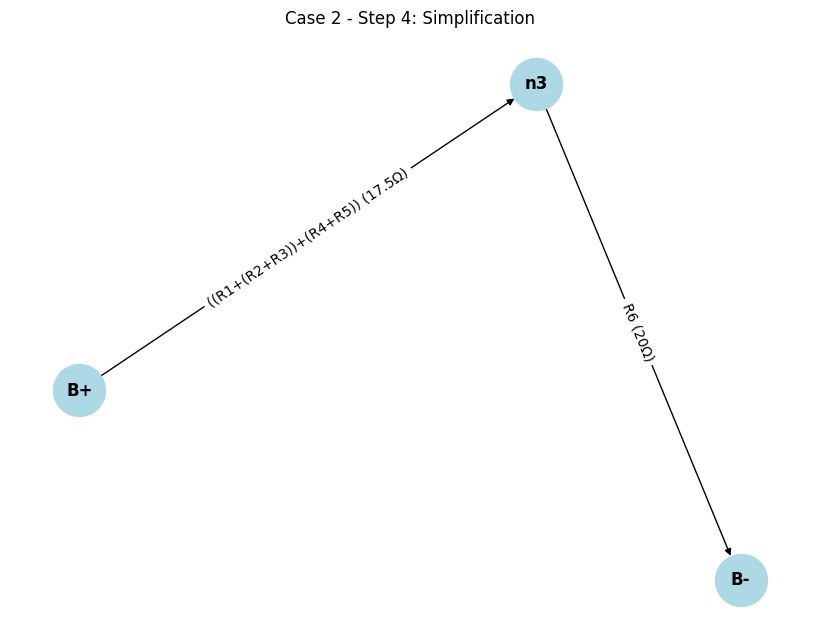

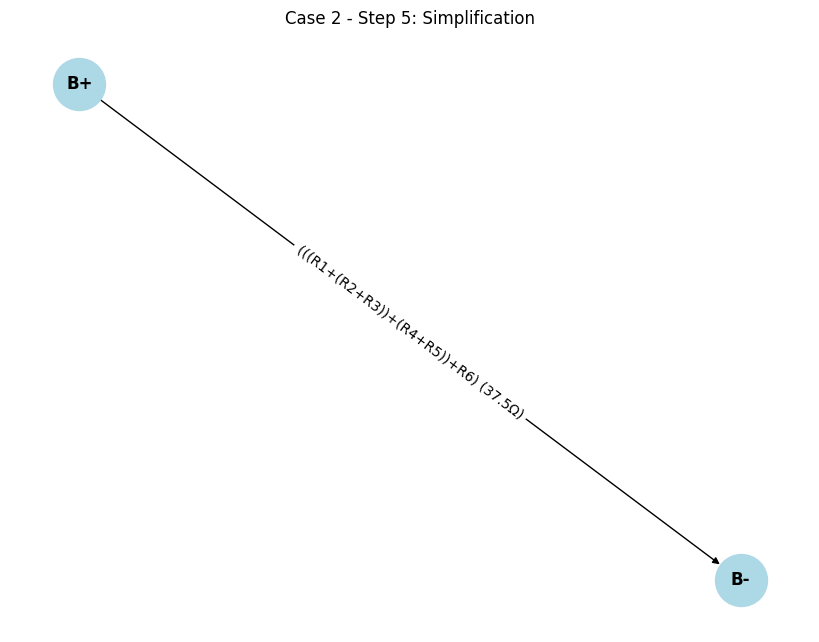

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_circuit(G, title, pos=None, filename=None):
    if pos is None:
        pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(8, 6))
    edge_labels = {}
    for u, v, k, d in G.edges(keys=True, data=True):
        label = d.get("label", "")
        res = d.get("resistance", "")
        full_label = f"{label} ({res}Ω)"
        if (u, v) in edge_labels:
            edge_labels[(u, v)] += f", {full_label}"
        else:
            edge_labels[(u, v)] = full_label

    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1400, font_weight="bold", arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    if filename:
        plt.savefig(filename)
    plt.show()
    return pos

def merge_parallel_edges(G):
    merged = False
    for u, v in list(G.edges()):
        edges = list(G.get_edge_data(u, v).items()) if G.has_edge(u, v) else []
        if len(edges) > 1:
            merged = True
            total_inv = sum(1 / d['resistance'] for _, d in edges if d['resistance'] > 0)
            label_comb = "+".join(d['label'] for _, d in edges)
            G.remove_edges_from([(u, v, k) for k, _ in edges])
            G.add_edge(u, v, label=f"({label_comb})", resistance=round(1 / total_inv, 2))
            break
    return merged

def merge_series_nodes(G):
    merged = False
    for node in list(G.nodes()):
        in_edges = list(G.in_edges(node, keys=True, data=True))
        out_edges = list(G.out_edges(node, keys=True, data=True))
        if len(in_edges) == 1 and len(out_edges) == 1:
            (u, _, k1, d1), (_, v, k2, d2) = in_edges[0], out_edges[0]
            if u != v and not G.has_edge(u, v):  # prevent loop or duplicate
                merged = True
                G.remove_edges_from([(u, node, k1), (node, v, k2)])
                G.remove_node(node)
                new_label = d1['label'] + "+" + d2['label']
                new_res = round(d1['resistance'] + d2['resistance'], 2)
                G.add_edge(u, v, label=f"({new_label})", resistance=new_res)
                break
    return merged

# Build Case 2 from diagram: edge-based structure
G = nx.MultiDiGraph()
G.add_edge("B+", "n1", label="R1", resistance=5)
G.add_edge("n1", "n2", label="R2", resistance=10)
G.add_edge("n1", "n2", label="R3", resistance=10)
G.add_edge("n2", "n3", label="R4", resistance=15)
G.add_edge("n2", "n3", label="R5", resistance=15)
G.add_edge("n3", "B-", label="R6", resistance=20)

# Draw initial
step = 0
pos = draw_circuit(G, f"Case 2 - Step {step}: Initial Circuit", filename=f"case2_step{step}.png")

# Simplify in steps
while True:
    step += 1
    changed = merge_parallel_edges(G) or merge_series_nodes(G)
    if not changed:
        break
    pos = draw_circuit(G, f"Case 2 - Step {step}: Simplification", pos=pos, filename=f"case2_step{step}.png")
